### We need to up sampling the data taken from kaggale source  https://www.kaggle.com/anish9167473766/churndata to create synthetic samples upto ~1 million. Here we used Weka tool for oversampling with class balanced synthesized data. Weka is an open source  software collection of machine learning algorithms for data mining tasks. 

In [22]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_hastie_10_2

from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import itertools


In [23]:


def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))


In [24]:
#from google.colab import drive 
#from google.colab import files
#import io

#uploaded = files.upload()

#data = io.BytesIO(uploaded['telecom_churn.csv']) 
#drive.mount('/content/gdrive')
#df=pd.read_csv('gdrive/my-drive/telecom_churn.csv.csv')
#churn_data = pd.read_csv(data)

churn_data = pd.read_csv("telecom_churn_resample_2.csv")
#churn_data = pd.read_csv("telecom_churn_org.csv")
#churn_data

In [25]:

churn_data.head()

,state,'account length','area code','phone number','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge',...,'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn
0,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False
1,NE,174,415,331-3698,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,False
2,FL,106,510,389-6955,no,no,0,159.6,94,27.13,...,118,23.53,223.5,65,10.06,8.8,3,2.38,0,False
3,WV,106,510,347-9738,no,no,0,194.8,133,33.12,...,73,18.14,190.8,92,8.59,11.5,7,3.11,0,False
4,ME,176,415,408-6621,no,no,0,223.2,76,37.94,...,131,18.22,154.4,80,6.95,10.1,2,2.73,3,False


In [13]:
#Dropping the 'categorical' columns as of now for "Oversampleing" Excercise
churn_data.drop(['state', '\'phone number\'', '\'international plan\'', '\'voice mail plan\'' ], axis=1, inplace=True)
#churn_data.drop(['state', 'phone number', 'international plan', 'voice mail plan' ], axis=1, inplace=True)
churn_data['churn'] = churn_data['churn'].apply(lambda x: 1 if x == False else -1)
#spilt the target varibale and Predictors
X = churn_data.drop("churn", axis = 1)
y = churn_data.churn

#X = churn_data[:20000].drop("churn", axis = 1)
#y = churn_data[:20000].churn
#print(churn_data['churn'])

churn_count = churn_data.churn.value_counts()
print("churn Class: ", len(churn_count))

#print('Class 0:', churn_count[0])
#print('Class 1:', churn_count[1])
#print('\n')

#print('Proportion:', round(churn_count[0] / churn_count[1], 2), ': 1')
#churn_data
#print(y)

#churn_data['churn'].head(1000)

churn Class:  2


In [14]:
churn_data.head()


,'account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn
0,106,408,0,158.7,74,26.98,64.3,139,5.47,198.5,103,8.93,10.2,4,2.75,1,1
1,174,415,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1
2,106,510,0,159.6,94,27.13,276.8,118,23.53,223.5,65,10.06,8.8,3,2.38,0,1
3,106,510,0,194.8,133,33.12,213.4,73,18.14,190.8,92,8.59,11.5,7,3.11,0,1
4,176,415,0,223.2,76,37.94,214.4,131,18.22,154.4,80,6.95,10.1,2,2.73,3,1


In [9]:
# Percentage of missing values in each column
missingDataCount = round((churn_data.isnull().sum()/len(churn_data))*100,2)
print("Percentage of missing data \n", missingDataCount)

Percentage of missing data 
 'account length'            0.0
'area code'                 0.0
'number vmail messages'     0.0
'total day minutes'         0.0
'total day calls'           0.0
'total day charge'          0.0
'total eve minutes'         0.0
'total eve calls'           0.0
'total eve charge'          0.0
'total night minutes'       0.0
'total night calls'         0.0
'total night charge'        0.0
'total intl minutes'        0.0
'total intl calls'          0.0
'total intl charge'         0.0
'customer service calls'    0.0
churn                       0.0
dtype: float64


In [10]:
# look at data statistics
churn_data.describe(include='all')

,'account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn
count,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.00000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000
mean,100.725513,436.516752,8.104810,179.733624,100.552335,30.555264,200.873125,100.09776,17.074397,200.428324,100.011261,9.019371,10.238914,4.485869,2.765022,1.551855,0.710171
std,39.577485,42.000144,13.674455,54.868634,20.014616,9.327658,50.680226,19.77694,4.307809,50.353594,19.537997,2.265943,2.793275,2.473865,0.754167,1.301166,0.704033
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,74.000000,408.000000,0.000000,143.300000,88.000000,24.360000,167.100000,87.00000,14.200000,166.700000,87.000000,7.500000,8.500000,3.000000,2.300000,1.000000,1.000000
50%,100.000000,415.000000,0.000000,179.300000,101.000000,30.480000,201.000000,100.00000,17.090000,201.000000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000
75%,127.000000,415.000000,19.000000,216.800000,114.000000,36.860000,235.300000,113.00000,20.000000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.00000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [11]:
churn_data.dropna(how='any', inplace = True)
#churn_data

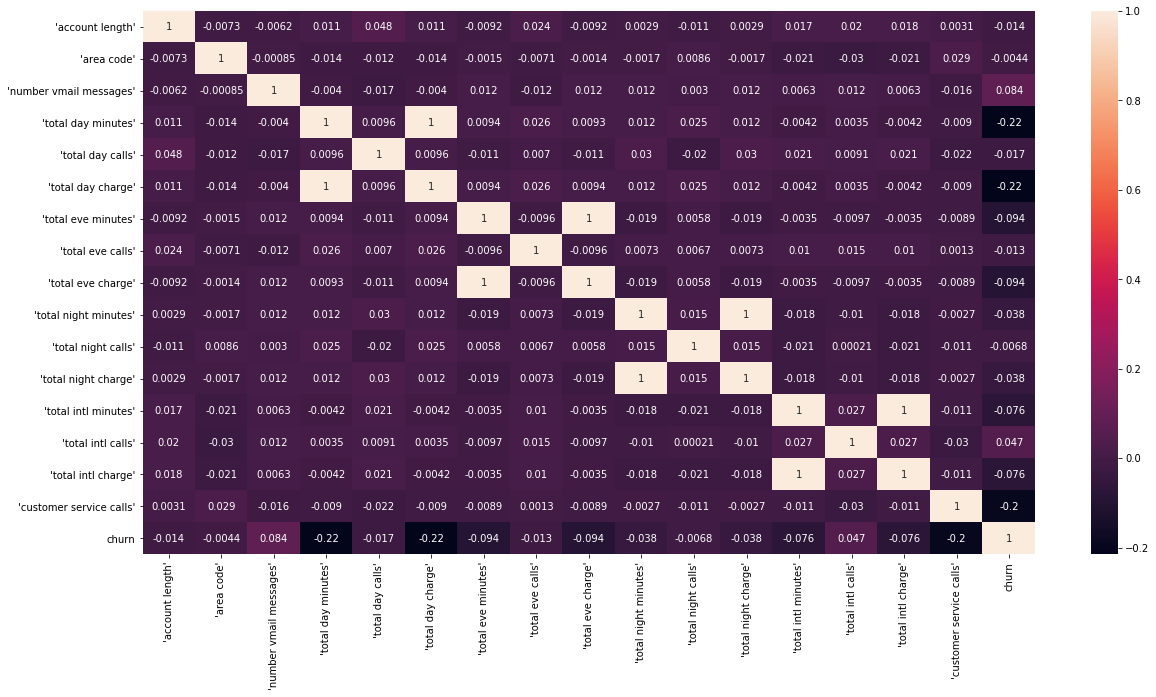

In [12]:
#plotting the correlation matrix, removing the multi colnearity
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(churn_data.corr(),annot = True)

NORMAL data distribution: Counter({1: 85500, -1: 14490})


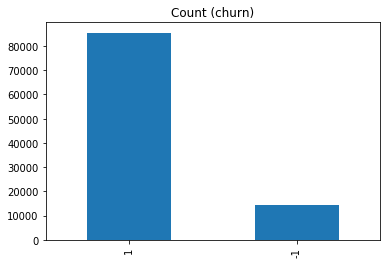

In [13]:
#Normal Distribution
print("NORMAL data distribution: {}".format(Counter(churn_data['churn'])))
churn_count.plot(kind='bar', title='Count (churn)');



In [14]:
#Evaluating with RandomForestClassifier
print("Normal disrtibution: {}" .format("subrata"))
#Normal Distribution
print("NORMAL data distribution: {}".format(Counter(churn_data['churn'])))

#Split the  data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#using RandomForestClassifier to predict the accuracy BEFORE up-sampling
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#Summary of the accuracy
print_results("\n Data distribution:",y_test, y_pred )



Normal disrtibution: subrata
NORMAL data distribution: Counter({1: 85500, -1: 14490})
Accuracy: 100.00%

 Data distribution:
accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [15]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state = 100)

In [16]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9051238457179052

In [17]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 10))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier( base_estimator=shallow_tree,  n_estimators = n_est)
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
   # score = accuracy_score(y_test, y_pred)
   # score = print_results("\nData distribution:",y_test, y_pred )
    #print("\n")
    results = confusion_matrix(y_test, y_pred)
    #print('Confusion Matrix :')
    #print(results)
    #print("*****************")
    #abc_scores.append(score)
    

In [18]:
# plot test scores and n_estimators
# plot
#plt.plot(estimators, abc_scores)
#plt.xlabel('n_estimators')
#plt.ylabel('accuracy')
#plt.ylim([0.85, 1])
#plt.show()

In [19]:
X_test.isnull().any().any()


False

In [20]:
""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err_train, err_test):
    #print ('Error rate: Training: %.4f - Test: %.4f False Negative: %.4f' % (err_train, err_test, err_miss_fn)) 
    print ('Error rate: Training: %.4f - Test: %.4f' % (err_train, err_test))

def  get_miss_fn(pred, Y) :
    s = 0
    for (x,y) in zip(pred, Y): 
        if (x == -1 and y == 1) :
            s += 1 
    return s

In [21]:
""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    #plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [22]:
#Split the  data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
           

In [24]:
import math

def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    miss_fn = []
    #print("w={} ".format(w))
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        #miss_fn = [int(x) for x in (pred_train_i == -1 and Y_train == 1)]
        miss_fn.clear()
        
       # for (x,y) in itertools.izip_longest(pred_train_i, Y_train): 
        for (x,y) in zip(pred_train_i, Y_train): 
            if (x == -1 and y == 1) :
                #print(x,y)
                miss_fn.append(1) 
            else :
                miss_fn.append(0)         
          
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        
        # Error
        err_m = np.dot(w,miss) / sum(w)
        
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))       
        alpha =  [ float(x) * alpha_m for x in miss2]
        beta  =   [ 0.2 * float(x) * alpha_m for x in miss_fn]
        alpha_beta = np.add(alpha,beta)
        exp_alpha_beta = np.exp(alpha_beta)
        w = np.multiply(w, exp_alpha_beta)
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [ x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [ x * alpha_m for x in pred_test_i])]
        
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    
    #print("sum(pred_train != Y)= {}".format(sum(pred_train != Y_train)))
    #print("Error: False Negative:{}".format(get_miss_fn(pred_train,Y_train )))
    
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
           

Using proposed cost sensitive Adaboost :


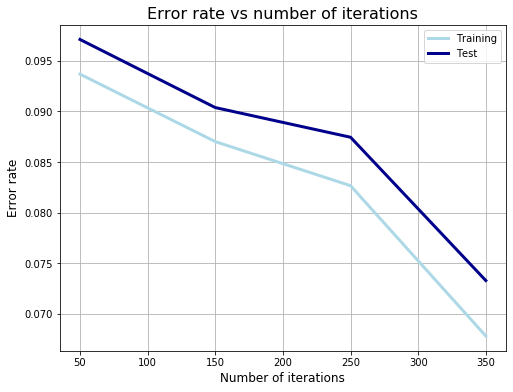

In [25]:
#Check the misclassification error ( test/train ) over each boosting rounds, it can be noticed
# the errors get reduced sharply over each boosting rounds

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
er_tree = generic_clf(y_train, X_train, y_test, X_test, clf_tree)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]

for i in [10, 20, 40]:    
    er_i = adaboost_clf(y_train, X_train, y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    #print_error_rate(er_i[0], er_i[1])  
    
print("Using proposed cost sensitive Adaboost :")
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)
